# Test for GALSIM simulated galaxies

In [9]:
import os
import galsim
import numpy as np
from galsim_util import get_galsim_image
import matplotlib.pyplot as plt
from astropy.visualization import MinMaxInterval, AsinhStretch, ImageNormalize

In [2]:
lin_scale = lambda x: x
asinh_scale = lambda x: np.arcsinh(x)
sqrt_scale = lambda x: np.sqrt(x)
log_scale = lambda x: np.log10(x)

In [3]:
# download full COSMOS catalog
#re_download = True
#if re_download:
#    galsim.download_cosmos.main

## Visualize a single image / PSF pair

PSF norm. : 0.9999964 (49, 49)


/Users/aymericg/anaconda3/envs/galsim/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:127: RuntimeWarning: divide by zero encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/Users/aymericg/anaconda3/envs/galsim/lib/python3.6/site-packages/astropy/visualization/mpl_normalize.py:127: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


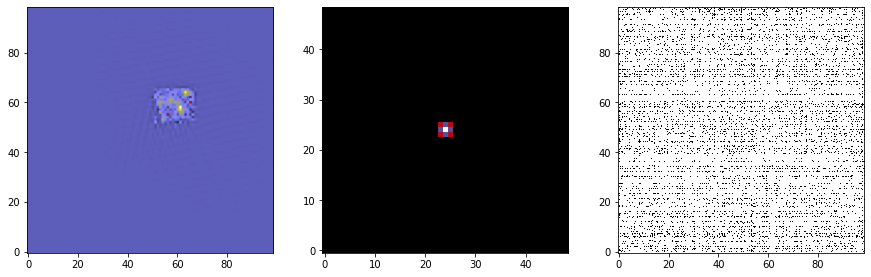

In [4]:
num_pix = 99
delta_pix = 0.08

global_index = 31

galsim_data_dir = '/Users/aymericg/Documents/EPFL/PhD_LASTRO/Code/divers/GalSim-releases-2.2/examples/data'
galsim_catalog = 'real_galaxy_catalog_23.5_example.fits'

image, psf_kernel, psf_kernel_untouched = get_galsim_image(num_pix, delta_pix,
                                                           catalog_index=global_index, 
                                                           galaxy_type='real',
                                                           galsim_scale=1,
                                                           galsim_angle=0,
                                                           psf_size=49, 
                                                           psf_pixel_size=delta_pix,
                                                           psf_type='gaussian',
                                                           no_convolution=False,
                                                           psf_gaussian_fwhm=0.07,
                                                           draw_image_method='auto',
                                                           galsim_center_x=10, 
                                                           galsim_center_y=10,
                                                           catalog_dir=galsim_data_dir,
                                                           catalog_name=galsim_catalog)
print("PSF norm. :", psf_kernel.sum(), psf_kernel.shape)

img_norm = ImageNormalize(image, interval=MinMaxInterval(), stretch=AsinhStretch())
psf_norm = ImageNormalize(psf_kernel, interval=MinMaxInterval(), stretch=AsinhStretch())
psf_unt_norm = ImageNormalize(psf_kernel_untouched, interval=MinMaxInterval(), stretch=AsinhStretch())

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
ax.imshow(lin_scale(image), norm=img_norm, origin='lower', cmap='gist_stern')
ax = fig.add_subplot(132)
ax.imshow(lin_scale(psf_kernel), norm=psf_norm, origin='lower', cmap='gist_stern')
ax = fig.add_subplot(133)
ax.imshow(lin_scale(psf_kernel_untouched), norm=psf_unt_norm, origin='lower', cmap='gist_stern')
plt.show()

## What's the difference between `'real'` and `'parametric'`

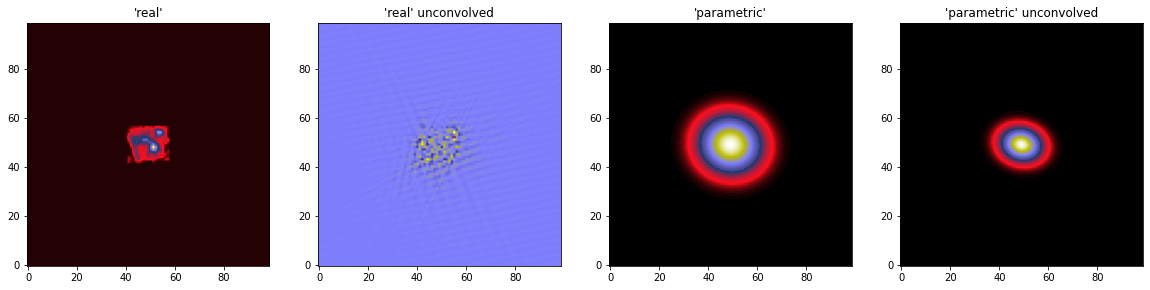

In [5]:
image_r, psf_kernel_r, _ = get_galsim_image(catalog_index=global_index, image_size=num_pix, pixel_size=delta_pix, 
                                         galsim_scale=1, psf_size=49, psf_pixel_size=delta_pix,
                                         galaxy_type='real',
                                           catalog_dir=galsim_data_dir,
                                                           catalog_name=galsim_catalog)
image_r_noconv, psf_kernel_r, _ = get_galsim_image(catalog_index=global_index, image_size=num_pix, pixel_size=delta_pix, 
                                         galsim_scale=1, psf_size=49, psf_pixel_size=delta_pix,
                                         galaxy_type='real', no_convolution=True,
                                                  catalog_dir=galsim_data_dir,
                                                           catalog_name=galsim_catalog)
image_p, psf_kernel_p, _ = get_galsim_image(catalog_index=global_index, image_size=num_pix, pixel_size=delta_pix, 
                                            galsim_scale=1, psf_size=49, psf_pixel_size=delta_pix,
                                            galaxy_type='parametric',
                                            psf_type='gaussian', psf_gaussian_fwhm=1,
                                           catalog_dir=galsim_data_dir,
                                                           catalog_name=galsim_catalog)
image_p_noconv, psf_kernel_p, _ = get_galsim_image(catalog_index=global_index, image_size=num_pix, pixel_size=delta_pix, 
                                         galsim_scale=1, psf_size=49, psf_pixel_size=delta_pix,
                                         galaxy_type='parametric', no_convolution=True,
                                                  catalog_dir=galsim_data_dir,
                                                           catalog_name=galsim_catalog)

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(141)
ax.set_title("'real'")
ax.imshow(lin_scale(image_r), norm=None, origin='lower', cmap='gist_stern')
ax = fig.add_subplot(142)
ax.set_title("'real' unconvolved")
ax.imshow(lin_scale(image_r_noconv), norm=None, origin='lower', cmap='gist_stern')
ax = fig.add_subplot(143)
ax.set_title("'parametric'")
ax.imshow(lin_scale(image_p), norm=None, origin='lower', cmap='gist_stern')
ax = fig.add_subplot(144)
ax.set_title("'parametric' unconvolved")
ax.imshow(lin_scale(image_p_noconv), norm=None, origin='lower', cmap='gist_stern')
plt.show()

## Is every PSF different ?

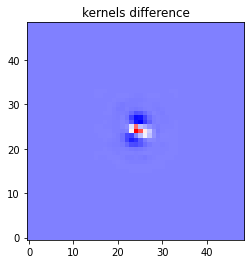

In [6]:
_, psf_kernel1, _ = get_galsim_image(catalog_index=1, image_size=num_pix, pixel_size=delta_pix, 
                                  galsim_scale=1, psf_size=49, psf_pixel_size=0.1,
                                  catalog_dir=galsim_data_dir, catalog_name=galsim_catalog)
_, psf_kernel2, _ = get_galsim_image(catalog_index=90, image_size=num_pix, pixel_size=delta_pix, 
                                  galsim_scale=1, psf_size=49, psf_pixel_size=0.1,
                                  catalog_dir=galsim_data_dir, catalog_name=galsim_catalog)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.set_title("kernels difference")
ax.imshow(psf_kernel1-psf_kernel2, origin='lower', cmap='bwr')
plt.show()

## What does ths PSF scale change ?

/Users/aymericg/anaconda3/envs/galsim/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


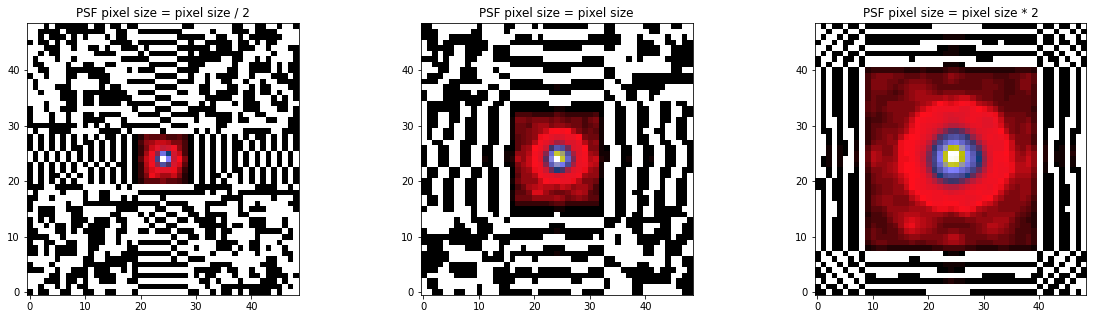

In [7]:
_, psf_kernel3, _ = get_galsim_image(catalog_index=1, image_size=num_pix, pixel_size=delta_pix, 
                                  galsim_scale=1, psf_size=49, psf_pixel_size=delta_pix/2,
                                  catalog_dir=galsim_data_dir, catalog_name=galsim_catalog)
_, psf_kernel4, _ = get_galsim_image(catalog_index=1, image_size=num_pix, pixel_size=delta_pix, 
                                  galsim_scale=1, psf_size=49, psf_pixel_size=delta_pix,
                                  catalog_dir=galsim_data_dir, catalog_name=galsim_catalog)
_, psf_kernel5, _ = get_galsim_image(catalog_index=1, image_size=num_pix, pixel_size=delta_pix, 
                                  galsim_scale=1, psf_size=49, psf_pixel_size=delta_pix*2,
                                  catalog_dir=galsim_data_dir, catalog_name=galsim_catalog)

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(131)
ax.set_title("PSF pixel size = pixel size / 2")
ax.imshow(sqrt_scale(psf_kernel3), origin='lower', cmap='gist_stern')
ax = fig.add_subplot(132)
ax.set_title("PSF pixel size = pixel size")
ax.imshow(sqrt_scale(psf_kernel4), origin='lower', cmap='gist_stern')
ax = fig.add_subplot(133)
ax.set_title("PSF pixel size = pixel size * 2")
ax.imshow(sqrt_scale(psf_kernel5), origin='lower', cmap='gist_stern')
plt.show()

## Access the catalog metadata

In [15]:
import astropy.io.fits as pf
from astropy.table import Table

with pf.open(os.path.join(galsim_data_dir, galsim_catalog)) as f:
    cat = Table(f[1].data)

In [16]:
cat

IDENT,RA,DEC,MAG,BAND,WEIGHT,GAL_FILENAME,PSF_FILENAME,GAL_HDU,PSF_HDU,PIXEL_SCALE,NOISE_MEAN,NOISE_VARIANCE,NOISE_FILENAME,stamp_flux
int32,float64,float64,float64,str5,float64,str32,str36,int32,int32,float64,float64,float64,str26,float64
100027,150.141258,1.59778,20.913000106811523,F814W,0.23257999122142792,real_galaxy_images.fits,real_galaxy_PSF_images.fits,0,0,0.029999999329447746,8.467229781672359e-05,7.455349987139925e-06,acs_I_unrot_sci_20_cf.fits,108.3051217480097
100438,150.13038,2.514552,22.201000213623047,F814W,0.23222000896930695,real_galaxy_images.fits,real_galaxy_PSF_images.fits,1,1,0.029999999329447746,0.00010393599950475618,7.4736299211508594e-06,acs_I_unrot_sci_20_cf.fits,33.44311959116749
100533,150.117017,2.513069,20.32200050354004,F814W,0.23687998950481415,real_galaxy_images.fits,real_galaxy_PSF_images.fits,2,2,0.029999999329447746,0.00019905800581909716,8.22513993625762e-06,acs_I_unrot_sci_20_cf.fits,201.04986946238682
100791,150.149447,2.871754,20.058000564575195,F814W,0.2347399890422821,real_galaxy_images.fits,real_galaxy_PSF_images.fits,3,3,0.029999999329447746,0.00016025500372052193,6.637039859924698e-06,acs_I_unrot_sci_20_cf.fits,236.0436687207548
100914,150.124106,2.846929,22.128999710083008,F814W,0.23612001538276672,real_galaxy_images.fits,real_galaxy_PSF_images.fits,4,4,0.029999999329447746,9.832280193222687e-05,9.069870429812e-06,acs_I_unrot_sci_20_cf.fits,33.24559587794511
101215,150.134618,1.940371,22.187000274658203,F814W,0.2295200079679489,real_galaxy_images.fits,real_galaxy_PSF_images.fits,5,5,0.029999999329447746,0.00010613800259307027,6.254419986362336e-06,acs_I_unrot_sci_20_cf.fits,35.490059262844625
101602,150.135537,2.245699,21.60099983215332,F814W,0.23457999527454376,real_galaxy_images.fits,real_galaxy_PSF_images.fits,6,6,0.029999999329447746,0.0001794059935491532,1.5588599126203917e-05,acs_I_unrot_sci_20_cf.fits,61.196901477349456
101644,150.145049,2.239176,22.42799949645996,F814W,0.23043999075889587,real_galaxy_images.fits,real_galaxy_PSF_images.fits,7,7,0.029999999329447746,1.6940599607551121e-06,1.3897500139137264e-05,acs_I_unrot_sci_20_cf.fits,26.772375351254595
101774,150.128221,1.655732,22.006000518798828,F814W,0.22742000222206116,real_galaxy_images.fits,real_galaxy_PSF_images.fits,8,8,0.029999999329447746,0.0003467650094535202,1.838000025600195e-05,acs_I_unrot_sci_20_cf.fits,41.25451511191932
